## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import os
import numpy as np

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

mouse_metadata_path=os.path.join('data','Mouse_metadata.csv')
study_results_path=os.path.join('data','Study_results.csv')

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single datase
full_mice_study_df=study_results_df.merge(mouse_metadata_df,how='left',on='Mouse ID')

# Display the data table for preview
full_mice_study_df
# full_mice_study_df.count()
# full_mice_study_df['Mouse ID'].value_counts()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
full_mice_count=len(full_mice_study_df['Mouse ID'].value_counts())
print(ull_mice_count)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_filter=full_mice_study_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)==True

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_study_df=full_mice_study_df.loc[duplicate_mice_filter,:]
# duplicate_mice_study_df.head(100)
duplicate_mice_ID=duplicate_mice_study_df['Mouse ID'].unique()
duplicate_mice_ID

# # Getting the unique mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice_filter=full_mice_study_df['Mouse ID'].isin(duplicate_mice_ID)==False

# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_study_df=full_mice_study_df.loc[unique_mice_filter,:]
unique_mice_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count=len(unique_mice_study_df['Mouse ID'].unique())
print(unique_mice_count)

248


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol=unique_mice_study_df['Tumor Volume (mm3)']

# Mean
mean_tumor_vol = np.mean(tumor_vol)
# print(f'Mean Tumor Volume: {mean_tumor_vol}')

# Median 
median_tumor_vol = np.median(tumor_vol)
# print(f'Median Tumor Volume: {median_tumor_vol}')

# Variance 
var_tumor_vol = np.var(tumor_vol,ddof = 0)
# print(f"The population variance using the NumPy module is {var_tumor_vol}")

# Standard Deviation
sd_tumor_vol = np.std(tumor_vol,ddof = 0)
# print(f"The population standard deviation using the NumPy module is {sd_tumor_vol}")

# SEM
sem_tumor_vol=sts.sem(tumor_vol)
# print(f"The population standard error of the mean using the SciPy module is {sem_tumor_vol}")

tumor_summary_columns={'Mean of Tumor Size (mm3)':[mean_tumor_vol],
                       'Median of Tumor Size (mm3)': [median_tumor_vol],
                       'Variance of Tumor Size (mm3)': [var_tumor_vol],
                       'Standard Deviation of Tumor Size (mm3)': [sd_tumor_vol],
                       'Standard Error of thee Mean for Tumor Size (mm3)':[sem_tumor_vol]
                      }

tumor_summary_stats_df=pd.DataFrame(tumor_summary_columns)

tumor_summary_stats_df.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# drug_group=unique_mice_study_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Assemble the resulting series into a single summary dataframe.



,Mean of Tumor Size (mm3),Median of Tumor Size (mm3),Variance of Tumor Size (mm3),Standard Deviation of Tumor Size (mm3),Standard Error of thee Mean for Tumor Size (mm3)
0,50.435293,48.933454,79.42064,8.911826,0.205591


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_reg_group=unique_mice_study_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Mean
mean_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].mean()
# print(f'Mean Tumor Volume: {mean_tumor_vol}')

# Median 
median_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].median()
# print(f'Median Tumor Volume: {median_tumor_vol}')

# Variance 
var_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].var()
# print(f"The population variance using the NumPy module is {var_tumor_vol}")

# Standard Deviation
sd_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].std()
# print(f"The population standard deviation using the NumPy module is {sd_tumor_vol}")

# SEM
sem_tumor_vol=drug_reg_group['Tumor Volume (mm3)'].sem()
# print(f"The population standard error of the mean using the SciPy module is {sem_tumor_vol}")

# Assemble the resulting series into a single summary dataframe.
drug_reg_columns={'Mean Tumor Volume (mm3)': mean_tumor_vol,
                  'Median Tumor Volume (mm3)': median_tumor_vol,
                  'Tumor Volume Variance': var_tumor_vol,
                  'Tumor Volume Standard Deviation': mean_tumor_vol,
                  'Tumor Volume Standard Error of the Mean': sem_tumor_vol}

drug_reg_df=pd.DataFrame(drug_reg_columns)

# print(drug_reg_df)
drug_reg_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,40.675741,0.329346
Ceftamin,52.591172,51.776157,39.290177,52.591172,0.469821
Infubinol,52.884795,51.820584,43.128684,52.884795,0.492236
Ketapril,55.235638,53.698743,68.553577,55.235638,0.603860
Naftisol,54.331565,52.509285,66.173479,54.331565,0.596466
Placebo,54.033581,52.288934,61.168083,54.033581,0.581331
Propriva,52.320930,50.446266,43.852013,52.320930,0.544332
Ramicane,40.216745,40.673236,23.486704,40.216745,0.320955
Stelasyn,54.233149,52.431737,59.450562,54.233149,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

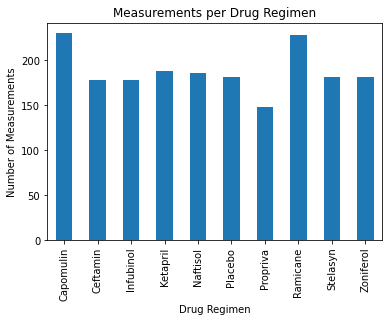

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_measurement_group=unique_mice_study_df.groupby('Drug Regimen')
regimen_measurement_df=regimen_measurement_group['Drug Regimen'].count()
regimen_measurement_df

regimen_measurement_df.plot(kind='bar')

plt.title("Measurements per Drug Regimen")
plt.ylabel('Number of Measurements')

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


Text(0, 0.5, 'Number of Measurements')

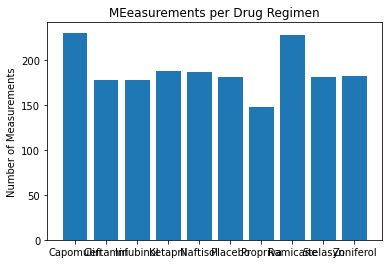

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_measurement_group=unique_mice_study_df.groupby('Drug Regimen').count
regimen_measurement_df

y=regimen_measurement_df
# print(y)

x=list(regimen_measurement_df.index)
print(x)

plt.bar(x,y)
plt.title("MEeasurements per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
# regimen_measurement_df.plot(kind='bar')

# plt.title("MEasurements per Drug Regimen")
# plt.ylabel('Number of Measurements')


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
rug_regimen_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
drug_filter=unique_mice_study_df.loc[:,'Drug Regimen'].isin(drug_regimen_list)
drug_filter

drug_studt_df=unique_mice_study_df.loc[drug_filter,:]
drug_studt_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_regimen_full_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

drug_regimen_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data={drug:list(unique_mice_study_df.loc[unique_mice_study_df['Drug Regimen']==drug,'Tumor Volume (mm3)']) for drug in drug_regimen_list}

tumor_vol_data['Capomulin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
# add subset 

    
# Determine outliers using upper and lower bounds
    

[45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.85119285,
 45.46224327,
 39.20212894,
 43.180977399999996,
 45.89372032,
 41.40859145,
 45.76088647,
 41.53409702,
 45.70443431,
 38.79647373,
 45.47375302,
 45.83899787,
 42.2616653,
 41.01991315,
 44.02275246,
 45.59706359,
 45.73714484,
 45.78174579,
 43.87849569,
 45.59568527,
 45.64143788,
 45.8956472,
 45.65133131,
 45.83939976,
 45.62238149,
 39.0054935,
 46.56841719,
 39.84822328,
 46.30400254,
 43.68802627,
 46.75907363,
 43.42101414,
 46.414517700000005,
 46.42536551,
 42.99207658,
 44.50204246,
 41.63001026,
 35.6244027,
 36.82536664,
 46.15473721,
 46.54429202,
 43.23196275,
 39.95234669,
 46.74900552,
 37.61494768,
 43.2708519,
 41.99922813,
 39.11389068,
 46.408361299999996,
 46.05960827,
 38.17723195,
 43.78489343,
 42.17230079,
 37.97877782,
 39.80445341,
 47.37342325,
 42.28366512,
 44.4409486

In [99]:
# #Verify that dictionary comprehension generated the correct list for each of the drug regimes
# cap_list=['Capomulin']
# cap_filter=unique_mice_study_df.loc[:,'Drug Regimen'].isin(cap_list)
# cap_filter

# drug_study_df=unique_mice_study_df.loc[cap_filter,:]
# drug_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
